<a href="https://colab.research.google.com/github/vipul-solanki/Tranform_EDA_HotelBookingAnalysis_dashboard/blob/main/EDA_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Transform EDA project to Dashboard.


*   Name - Vipul Solanki
*   EDA - Hotel Booking Analysis


*   Contribution - Individual

*   Github link - https://github.com/vipul-solanki/Tranform_EDA_HotelBookingAnalysis_dashboard.git
*   EDA project link - https://colab.research.google.com/drive/1P_DEFIR9UVUc7q0ZQH8Bo2pdXEu7oww7?usp=sharing


*   Dataset link - https://drive.google.com/file/d/1AVplKEA5EyJ2t9jNVy_aO4kN6KglYeGe/view?usp=sharing

*   Tableau link - https://public.tableau.com/views/HotelBookingAnalysis_17019624646040/HotelBookingAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link






# Project Summary -

The primary goal of this project is to enhance the accessibility and visualization of insights derived from an exploratory data analysis (EDA) of hotel booking data. The initial EDA project provided valuable insights into booking patterns, customer preferences, and other relevant metrics. However, to make these findings more user-friendly and actionable, the project will be extended to create an interactive and dynamic dashboard.


Columns description of hotel booking analysis dataset.

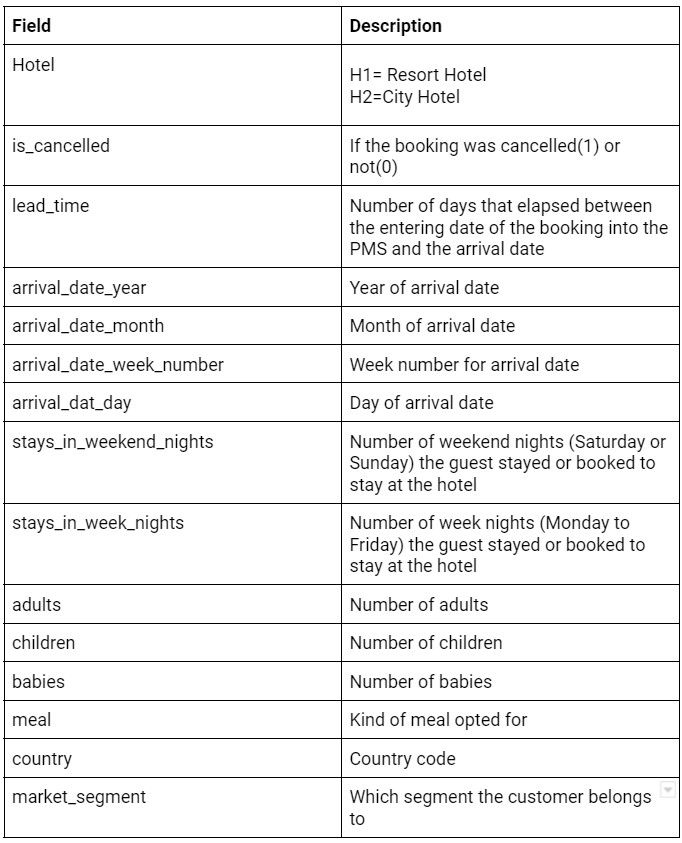

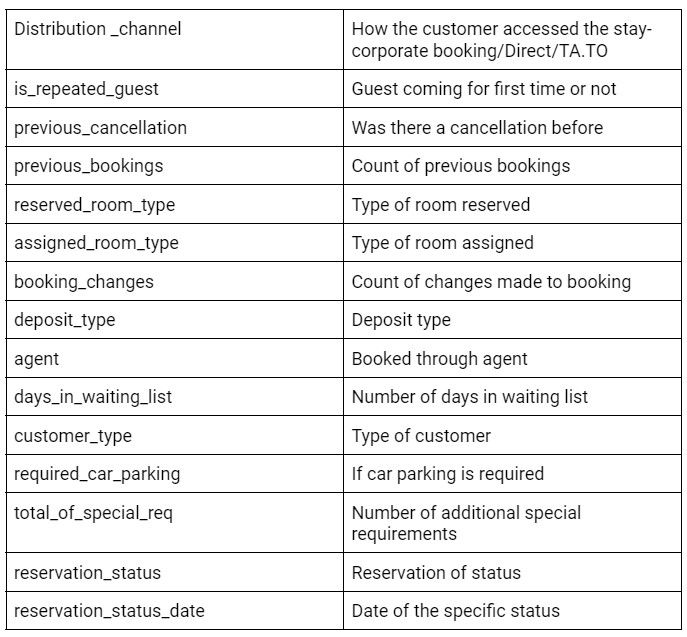

## Define Your Business Objective?

Create Stunning Tableau Dashboard from the same dataset on which EDA was performed for the capstone project. Which will give us meaningful insights.

# Let's Begin!

### Know our data!

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset
path = "/content/drive/MyDrive/Almabetter/Project/module 4/Hotel Bookings.csv"
df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Name of all dimensions.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# As we notice company has lot of null values. Better to drop that.
df.drop(columns='company', inplace = True)

In [ ]:
# Rows and columns of datasets.
df.shape

(119390, 31)

In [ ]:
# Checking for duplicate.
df.duplicated().value_counts()

# true - duplicate
# false - unique

False    87389
True     32001
dtype: int64

In [ ]:
# Removing duplicate
df = df.drop_duplicates()

In [ ]:
df.shape

# (rows, columns)

(87389, 31)

### Handing outliers

In [ ]:
# Obtaining Numerical varibles
numerical_variables=[i for i in df.columns if df[i].dtypes!='O']

# Obtaining continious numerical varibles
continious_variable = []
for item in numerical_variables:
  if len(df[item].value_counts()) > 150:
    continious_variable.append(item)

continious_variable

['lead_time', 'agent', 'adr']

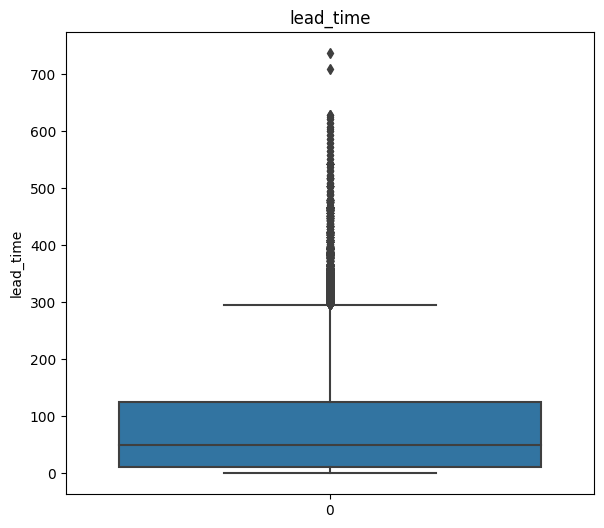

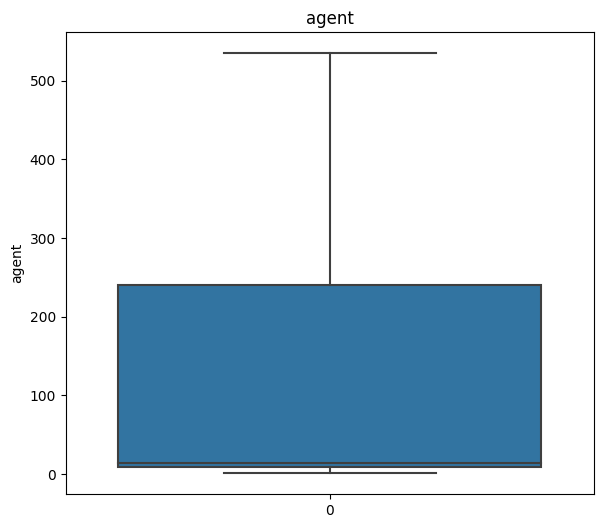

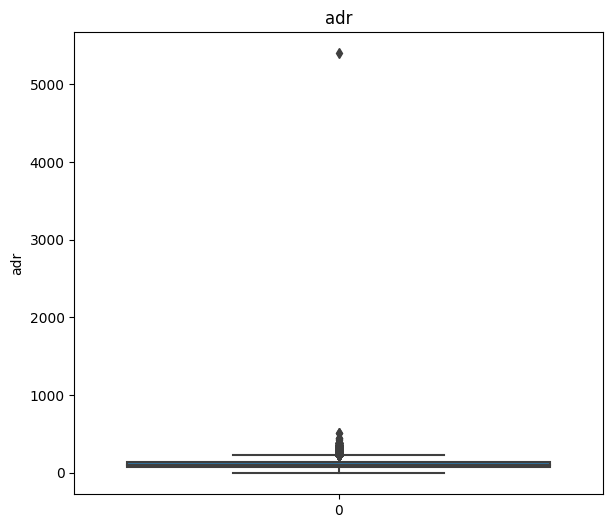

In [ ]:
# Box plot to identify the outliers.

for i in continious_variable:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

In [ ]:
# Using Inter Quartile range in skew symmetric curve for removing outliers

# Outlier columns
outliers_columns=['lead_time','adr']

# Capping dataset
for i in outliers_columns:
    #Findng IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining lower and upper limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

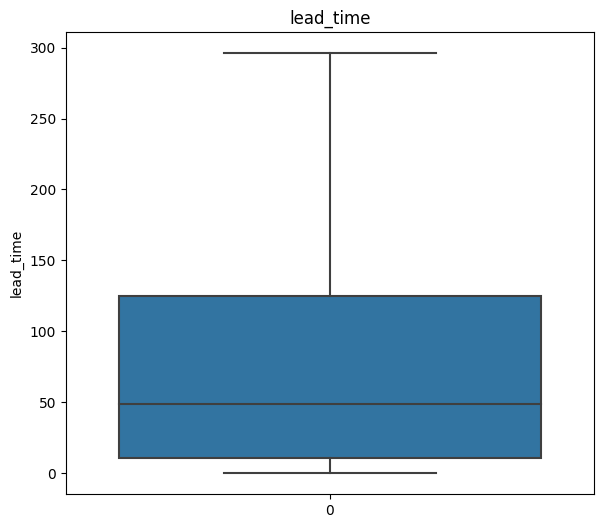

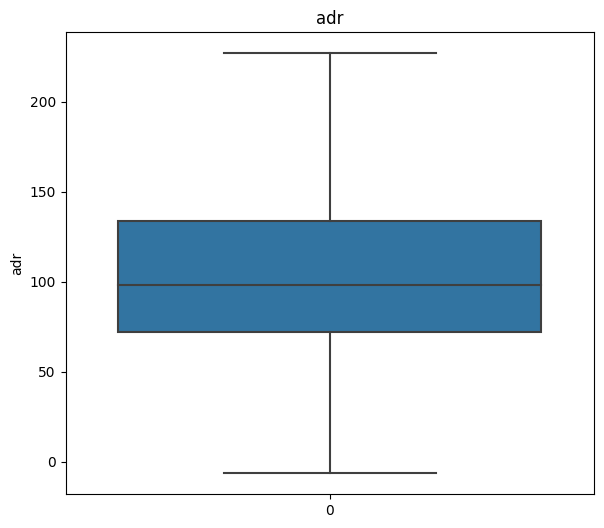

In [ ]:
# Checking for outliers

for i in outliers_columns:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

### Handing null values

In [ ]:

# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

# Getting nulls in column
# agent,country,children

hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [ ]:
# Replace the null value with approprite values.
df['agent'].fillna(0,inplace=True)
df['country'].fillna('others',inplace=True)
df['children'].fillna(df['children'].mean(),inplace=True)

In [ ]:
# Checking again for nulls.

df.isnull().sum().sort_values(ascending=False).head()

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

### Pair plot

<Figure size 1000x800 with 0 Axes>

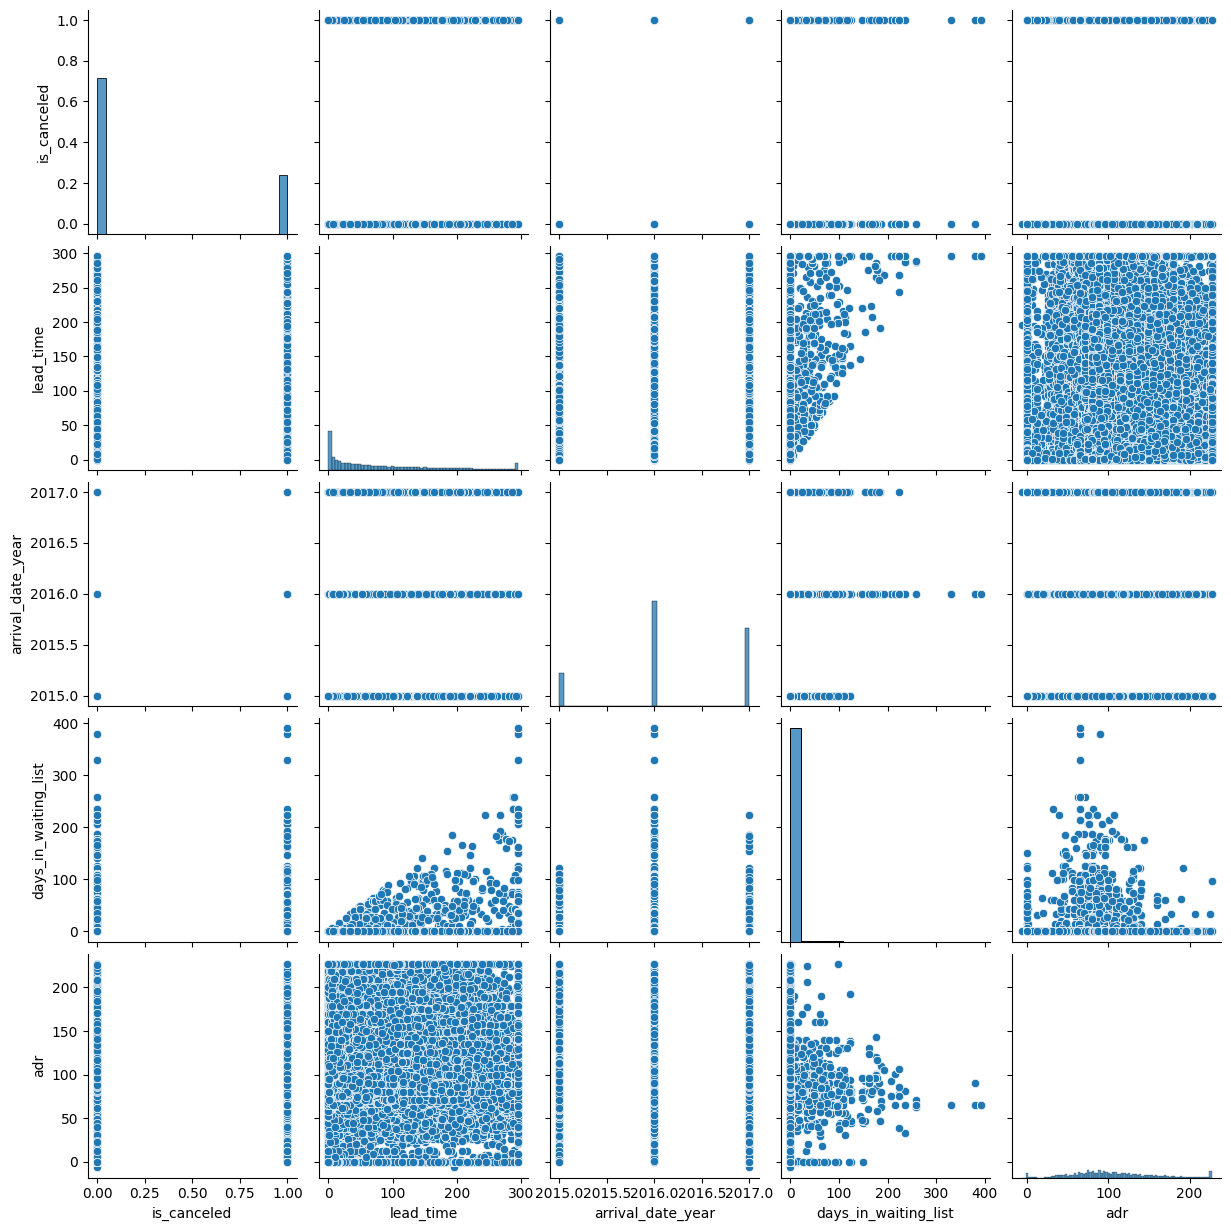

In [ ]:
#  Pair Plot visualization code

# Creating new dataset
new_df=df[['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type','days_in_waiting_list', 'customer_type', 'adr']]

# Plotting pair plot for dataset
plt.figure(figsize=(10,8))
ax=sns.pairplot(new_df)
plt.show()

# Tableau Dashboard -

Tableau link - https://public.tableau.com/views/HotelBookingAnalysis_17019624646040/HotelBookingAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [ ]:
# Save the dataset after data wranging.
df.to_excel('processed_data.xlsx', index=False)

Here is the screenshot of tableau dashboard -

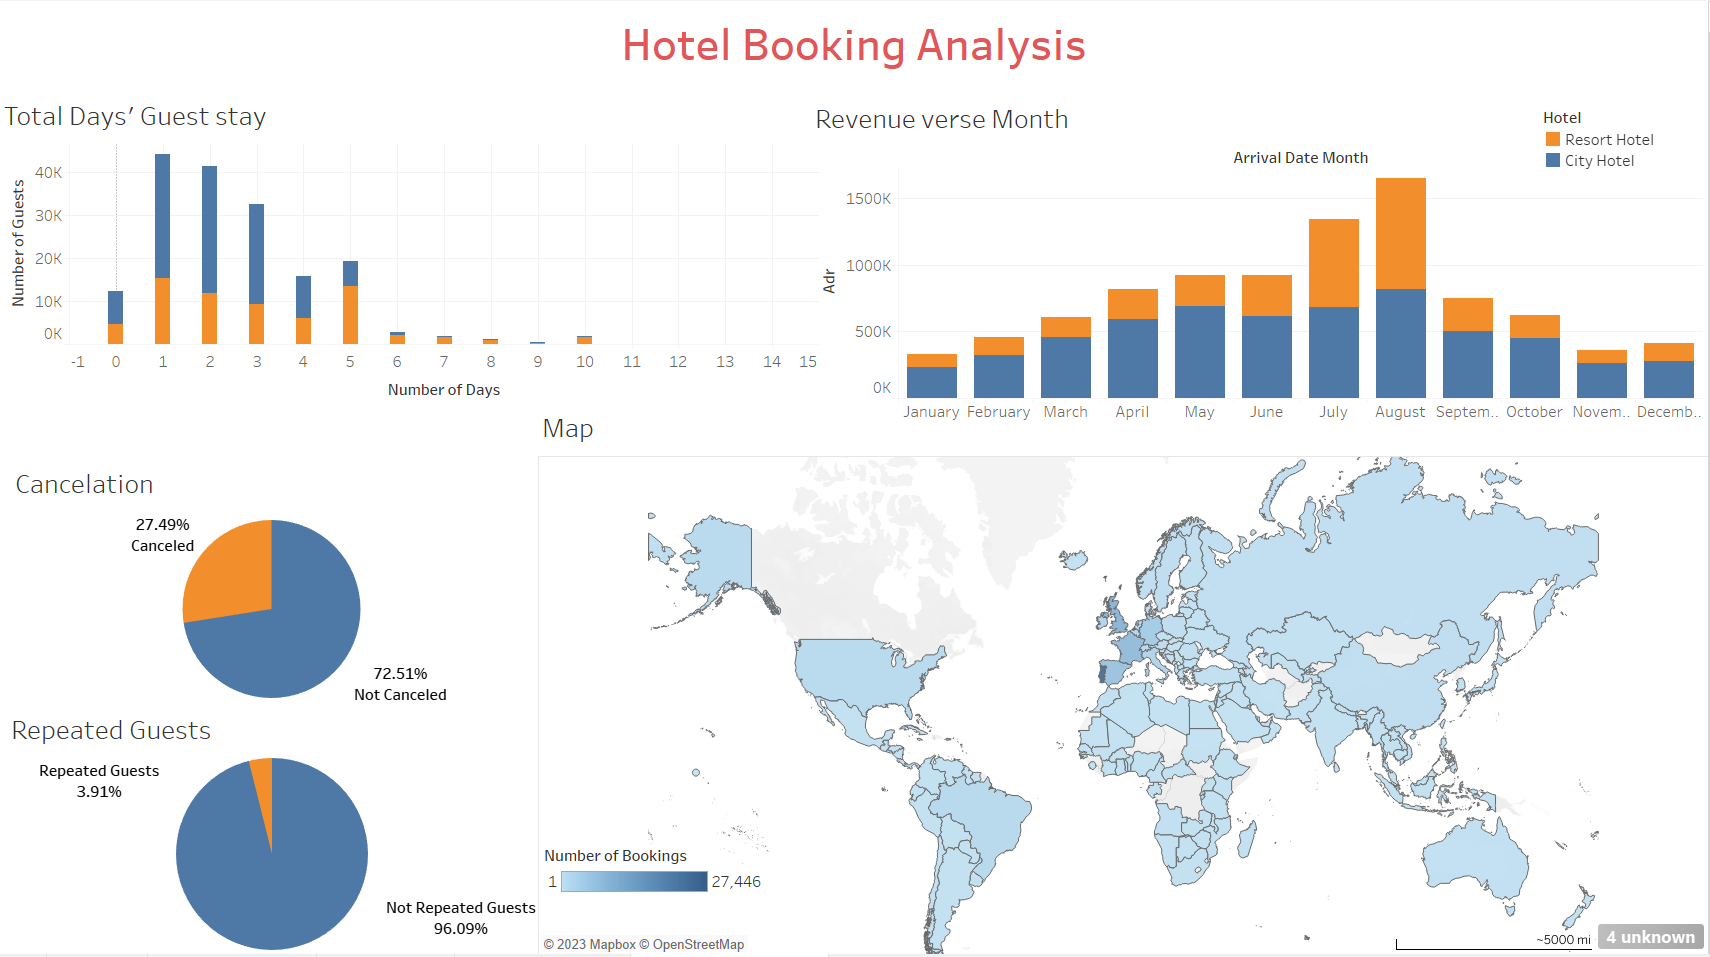